In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, LogisticRegression, SGDClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [5]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [6]:
file = 'Raisin_Dataset.CSV'
df = pd.read_csv(file, encoding = 'cp949')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [8]:
enc = LabelEncoder()
#enc.fit(df_data['Class'].unique())
#enc.transform(df_data['Class'])

y = enc.fit_transform(df['Class'])

X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

scale = MinMaxScaler().fit(X)
X = scale.transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state =10)

In [10]:
m = LogisticRegression(solver = 'liblinear')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.8622222222222222
test score :  0.8488888888888889


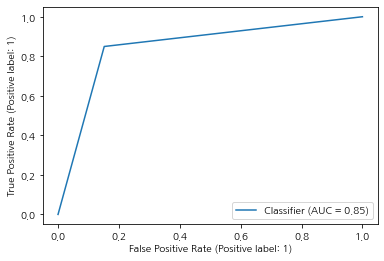

In [11]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [12]:
m = SGDClassifier(loss = 'log_loss')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.8548148148148148
test score :  0.8533333333333334


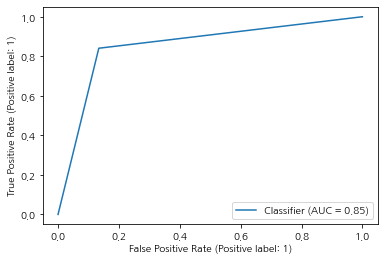

In [13]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [14]:
# split하고 난 다음에 scale을 줘야 조금 더 맞는 것이다.
# test데이터에도 scale가 들어가면 안된다.


enc = LabelEncoder()
#enc.fit(df_data['Class'].unique())
#enc.transform(df_data['Class'])

y = enc.fit_transform(df['Class'])

X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state =10)

# train과 test를 나누고 거기서 scaleing이 들어가야한다.
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

m = LogisticRegression(solver = 'liblinear')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))


m = SGDClassifier(loss = 'log_loss')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.8637037037037038
test score :  0.8488888888888889
train score :  0.8148148148148148
test score :  0.8133333333333334


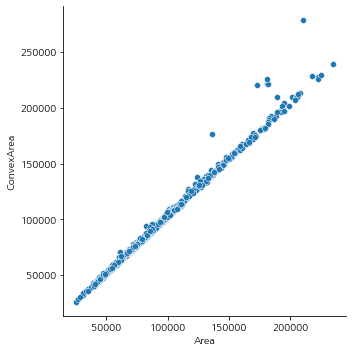

In [16]:
#print(df)
sns.relplot(data = df, x = 'Area', y = 'ConvexArea')

# Area와 ConvexArea는 서로 상관도가 너무 높다.
# 이러한 두개의 independent를 같이 쓰면 너무 안좋다.
# Naive Bayes는 이러한 independent끼리의 상관도가 아예 없다고 가정하고 모델을 만드는 것이다.